What are the most demanded skills for the Top 3 most popular data roles?

Methodology
1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_US = df[df['job_country'] == 'United States'].copy()

In [3]:
df_skills = df_US.explode('job_skills').copy()
df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


In [4]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size().copy()

df_skills_count = df_skills_count.reset_index(name='skills_count')

df_skills_count.sort_values(by='skills_count', ascending=False, inplace=True)

df_skills_count


,job_skills,job_title_short,skills_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [5]:
job_titles = df_skills_count['job_title_short'].value_counts().head(3).index.copy()
job_titles = sorted(job_titles)
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

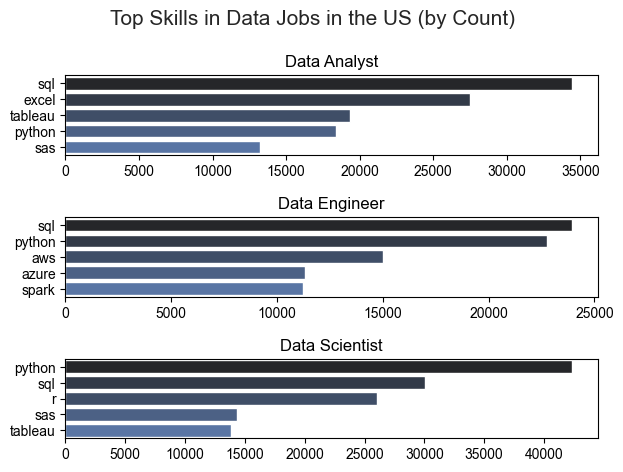

In [6]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    sns.barplot(
        data=df_plot, 
        x='skills_count', 
        y='job_skills', 
        hue='job_skills', 
        ax=ax[i], 
        palette='dark:b')
    
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

fig.suptitle('Top Skills in Data Jobs in the US (by Count)', fontsize=15)      
plt.tight_layout()
plt.show()


In [7]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total').copy()
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [8]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = (df_skills_perc['skills_count'] / df_skills_perc['jobs_total']) * 100

(df_skills_perc[df_skills_perc['job_title_short']
    .isin(job_titles)]
    .sort_values(by='skill_percent', ascending=False)
    .reset_index(drop=True)
    )

,job_skills,job_title_short,skills_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Engineer,23958,35080,68.295325
2,python,Data Engineer,22762,35080,64.885975
3,sql,Data Scientist,30034,58830,51.052184
4,sql,Data Analyst,34452,67816,50.802171
...,...,...,...,...,...
662,msaccess,Data Analyst,1,67816,0.001475
663,qt,Data Analyst,1,67816,0.001475
664,openstack,Data Analyst,1,67816,0.001475
665,asp.net core,Data Analyst,1,67816,0.001475


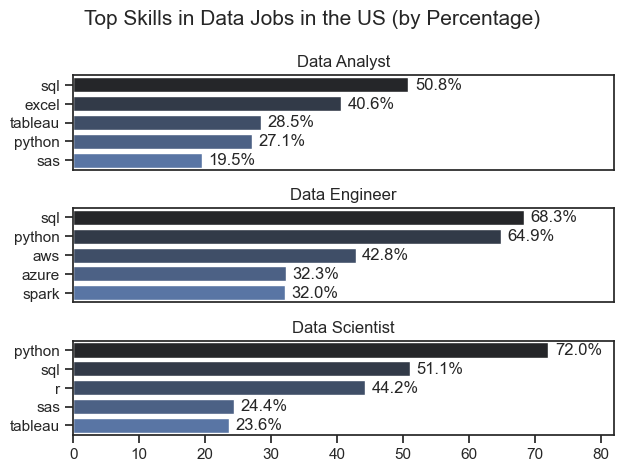

In [9]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(
        data=df_plot, 
        x='skill_percent', 
        y='job_skills', 
        hue='job_skills',
        ax=ax[i], 
        palette='dark:b')
    
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 82)

    for idx, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, idx, f"{v:.1f}%", va='center')
    
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Top Skills in Data Jobs in the US (by Percentage)', fontsize=15)      
plt.tight_layout()
plt.show()
